In [12]:
#RANDOM FOREST CLASSIFIER (RFC) ALGORITHM

In [13]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('FinalData/FinalCP.csv')

In [15]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,100,33,30,20.879744,82.002744,6.502985,202.935536,rice
1,78,55,31,21.770462,80.319644,7.038096,226.655537,rice
2,66,51,38,23.004459,82.320763,7.840207,263.964248,rice
3,71,36,43,26.491096,80.158363,6.980401,242.864034,rice
4,89,46,39,20.130175,81.604873,7.628473,262.717340,rice


In [16]:

#seperating the features and the target label
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

#features = df[['temperature', 'humidity', 'ph', 'rainfall']]

labels = df['label']

In [17]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [18]:
# Initialzing empty lists to append all model's name and corresponding name

acc = []
model = []

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99772727, 0.99090909, 0.99090909, 0.99545455])

In [22]:
import pickle

# Dump the trained Naive Bayes classifier with Pickle

RF_pkl_filename = 'randomforrestcp.pkl'

# Open the file to save as pkl file

RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

# Close the pickle instances

RF_Model_pkl.close()

In [23]:
data = np.array([[90,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [24]:
data = np.array([[50,70, 14, 45.603016, 40.3, 4.7, 90.91]])
prediction = RF.predict(data)
print(prediction)

['pigeonpeas']


In [25]:
data = np.array([[100,30, 35, 20.145621, 80.3, 6.7, 200.11]])
prediction = RF.predict(data)
print(prediction)

['rice']


<Figure size 1000x1700 with 0 Axes>

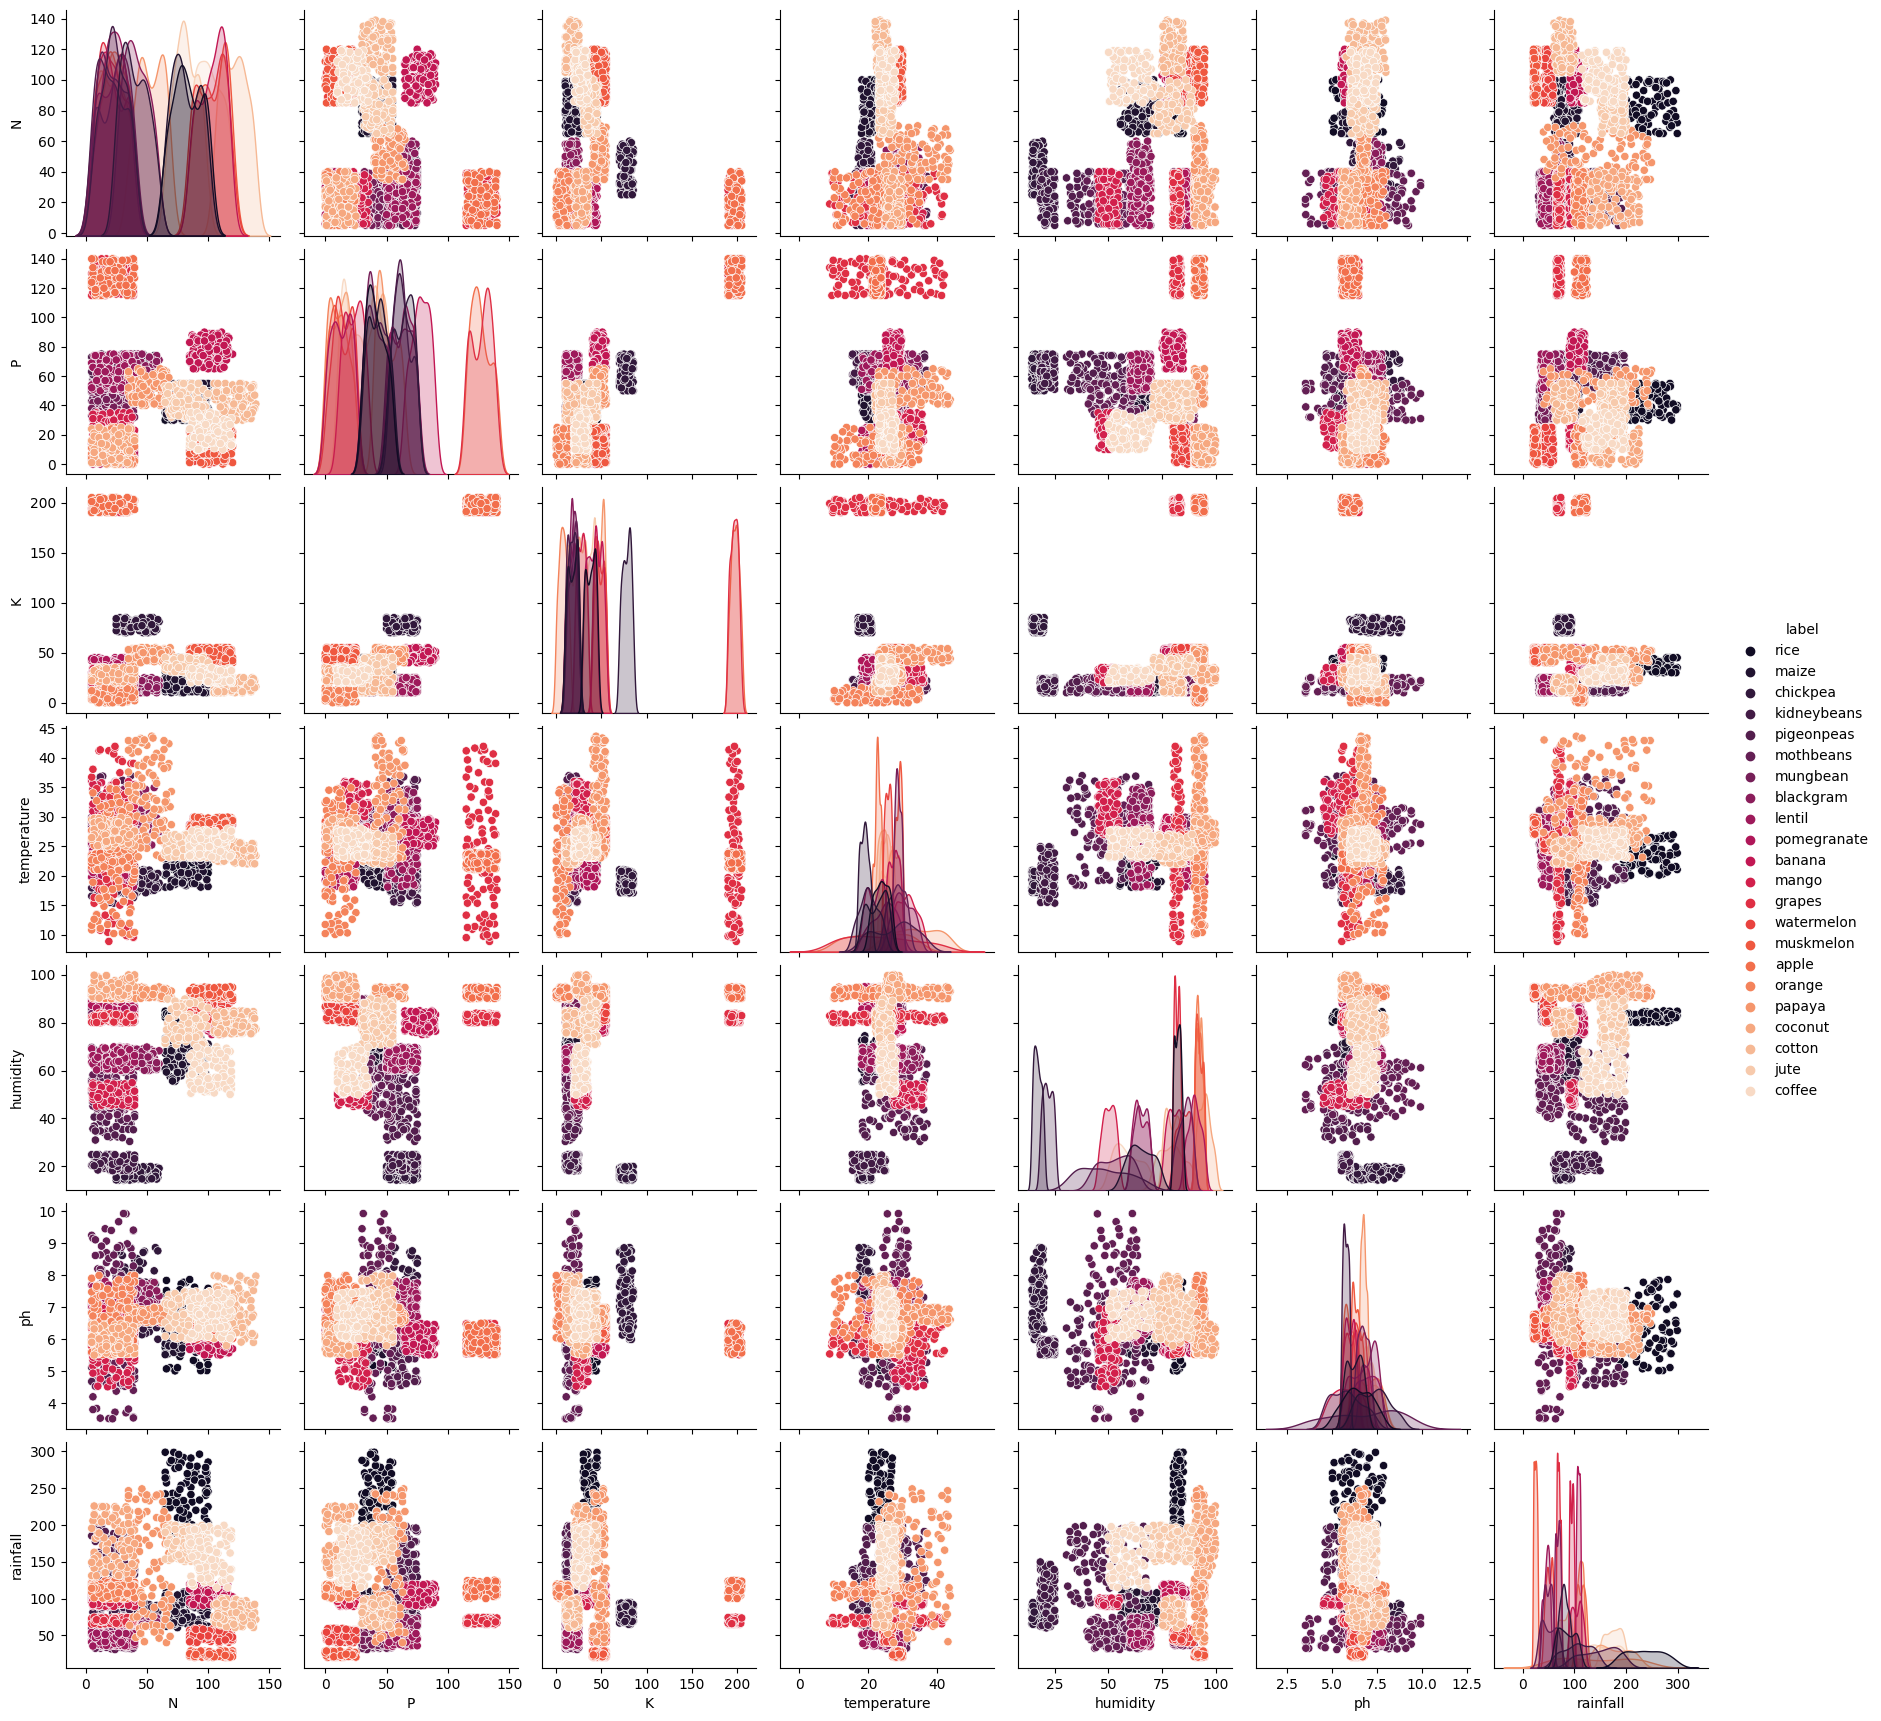

In [30]:
plt.figure(figsize = (10, 17))
sns.pairplot(df, hue = 'label', palette = 'rocket')
plt.show()